### 예제
1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합 (tran)
3. tran_d_1, tran_d_2 단순하게 행을 추가 결합 (tran_d)
4. 2번, 3번 과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 열 left (tran)를 기준으로 열결합 (transaction)

In [6]:
import pandas as pd

In [7]:
## 파일 로드
tran1 = pd.read_csv("../csv/tran_1.csv")
tran2 = pd.read_csv("../csv/tran_2.csv")
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [8]:
## 단순하게 행 결합
tran = pd.concat([tran1, tran2], axis = 0, ignore_index = True)

In [9]:
tran_d = pd.concat([tran_d_1, tran_d_2], axis = 0, ignore_index = True)

In [10]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [11]:
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [12]:
## 특정 조건에 맞춰서 tran을 기준으로 열을 추가 결합 
## 특정 조건 (transaction_id)
## how (left = tran)
transaction = pd.merge(
    left = tran, 
    right = tran_d, 
    on = 'transaction_id', 
    how = 'left'
)


### 데이터 결합2
1. 파일 로드 (customer_mater, item_master)
2. 1번 과정에서 불러온 2개의 데이터프레임을 transaction에 조건에 맞게 조인 결합
3. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼을 추가 (quantity * item_price)
4. payment_date 컬럼을 시계열 데이터로 변경

In [13]:
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [14]:
customer = pd.read_csv("../csv/customer_master.csv")
item = pd.read_csv("../csv/item_master.csv")

In [15]:
customer.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [16]:
item.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [17]:
## transaction, customer_master의 특정 조건으로 결합
## 조건 -> customer_id
join_data = pd.merge(
    left = transaction, 
    right = customer, 
    on = 'customer_id',
    how = 'left' 
)

In [18]:
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [19]:
## join_data, customer_master의 특정 조건으로 결합
## 조건 -> item_id
total_df = pd.merge(
    left = join_data, 
    right = item, 
    on = 'item_id',
    how = 'left' 
    
)

In [20]:
total_df['total_price'] = total_df['quantity'] * total_df['item_price']

In [21]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [22]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7144 non-null   object 
 1   price           7144 non-null   int64  
 2   payment_date    7144 non-null   object 
 3   customer_id     7144 non-null   object 
 4   detail_id       7144 non-null   int64  
 5   item_id         7144 non-null   object 
 6   quantity        7144 non-null   int64  
 7   name            6069 non-null   object 
 8   class           6069 non-null   object 
 9   gender          6069 non-null   object 
 10  start_date      6069 non-null   object 
 11  end_date        1978 non-null   object 
 12  campaign_id     6069 non-null   object 
 13  is_deleted      6069 non-null   float64
 14  item_name       7144 non-null   object 
 15  item_price      7144 non-null   int64  
 16  total_price     7144 non-null   int64  
dtypes: float64(1), int64(5), object(1

In [23]:
total_df['payment_date'] = pd.to_datetime(
    total_df['payment_date'], 
    format = '%Y-%m-%d %H:%M:%S')

In [24]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [25]:
## 시계열 데이터에서 년도-월 부분만 따로 추출 -> pyment_month 컬럼 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime("%Y-%m")

In [26]:
total_df['payment_date'].dt.strftime("%Y/%m")

0       2019/02
1       2019/02
2       2019/02
3       2019/02
4       2019/02
         ...   
7139    2019/07
7140    2019/07
7141    2019/07
7142    2019/07
7143    2019/07
Name: payment_date, Length: 7144, dtype: object

In [27]:
total_df['payment_date'].dt.strftime("%Y년/%m월")

0       2019년/02월
1       2019년/02월
2       2019년/02월
3       2019년/02월
4       2019년/02월
          ...    
7139    2019년/07월
7140    2019년/07월
7141    2019년/07월
7142    2019년/07월
7143    2019년/07월
Name: payment_date, Length: 7144, dtype: object

In [28]:
total_df['payment_date'].dt.strftime("%y년/%m월") # y는 년도를 두 자리로 나타냄

0       19년/02월
1       19년/02월
2       19년/02월
3       19년/02월
4       19년/02월
         ...   
7139    19년/07월
7140    19년/07월
7141    19년/07월
7142    19년/07월
7143    19년/07월
Name: payment_date, Length: 7144, dtype: object

In [29]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,2019-02


## 그룹화 예제
1. payment_month를 기준으로 그룹화
2. total_price의 합계, price 합계를 출력
3. 2개의 합계를 matplotlib을 이용하여 라인그래프로 시각화 (subplot 이용)

In [44]:
## 그룹화 (payment_month를 기준)

# cse1
total_df.groupby('payment_month').sum()[['price', 'total_price']]

C:\Users\intco\AppData\Local\Temp\ipykernel_14896\3024326375.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum()[['price', 'total_price']]


,price,total_price
payment_month,,
2019-02,179190000,160185000
2019-03,175375000,160370000
2019-04,176720000,160510000
2019-05,171385000,155420000
2019-06,183395000,164030000
2019-07,188685000,170620000


In [49]:
# case2
total_df.groupby('payment_month').sum().loc[:, ['price', 'total_price']]

C:\Users\intco\AppData\Local\Temp\ipykernel_14896\3304606517.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum().loc[:, ['price', 'total_price']]


,price,total_price
payment_month,,
2019-02,179190000,160185000
2019-03,175375000,160370000
2019-04,176720000,160510000
2019-05,171385000,155420000
2019-06,183395000,164030000
2019-07,188685000,170620000


In [54]:
# case3
group_date = total_df.groupby('payment_month').sum().iloc[:, [0, 5]]

C:\Users\intco\AppData\Local\Temp\ipykernel_14896\1082408066.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_date = total_df.groupby('payment_month').sum().iloc[:, [0, 5]]


In [55]:
import matplotlib.pyplot as plt

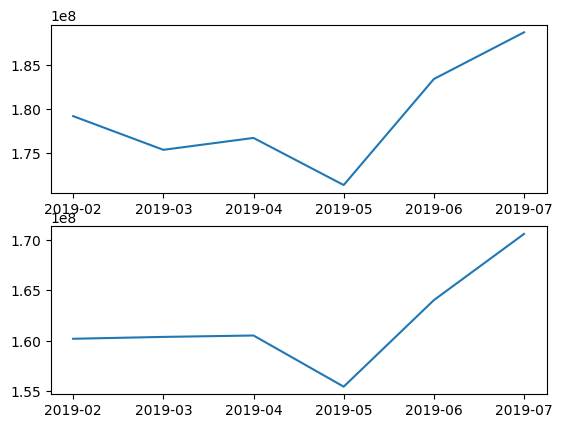

In [65]:
## 라인 그래프 시각화
## subplot을 이용하여 그래프를 2개 생성
plt.subplot(2, 1, 1)
plt.plot(group_date['price'])

plt.subplot(2, 1, 2)
plt.plot(group_date['total_price'])

plt.show()

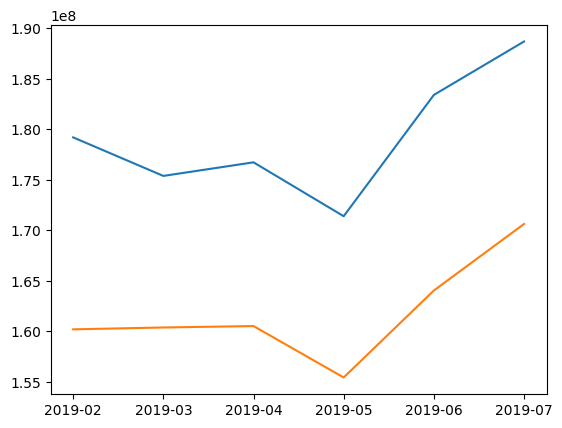

In [64]:
plt.plot(group_date)
plt.show()

### apply()
1. 스리즈의 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여 결과값을 스리즈의 형태로 리턴
2. apply (일반함수), apply (lambda함수)

### 예제3
1. total_df에서 gender 컬럼의 값들의 데이터를 확인
2. M, F, NaN 데이터가 있는 것을 확인
3. M은 남자, F는 여자, NaN는 무응답으로 데이터를 변경 (apply 사용)

In [77]:
total_df['gender']

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [78]:
## 결측치 확인
total_df['gender'].isna().sum()

1075

In [79]:
total_df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [83]:
## gender 컬럼의 데이터를 m는 남자 f는 여자 NaN 무응답 변경

## case1 (apply와 일반함수)
def change(x):
    # print(x)
    # return x
    if x == 'M':
        result = '남자'
        # return '남자'
    elif x == 'F':
        result = '여자'
        # return '여자'
    else:
        result = '무응답'
        # return '무응답'

    return result
    
total_df['gender'].apply(change)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [84]:
## case2 (apply lambda 함수 사용)
total_df['gender'].apply(
    lambda y : '여자' if (y == 'F') else (
        '남자' if (y == 'M') else '무응답'
        ) 
)

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object